In [1]:
# Calculo de las curvas de intensidad - duración - tiempo de retorno.

# Nos permite leer archivos de excel.
# !pip install openpyxl

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Nos permite conocer información acerca de las
# carpetas y archivos, entre otras cosas.
import os

# Nos permite obtener nombres y formatos locales, como "Abr" en vez de "Apr".
import locale
# Para Linux y Mac
locale.setlocale(locale.LC_TIME, "es_ES")
# Para Windows
#locale.setlocale(locale.LC_ALL, "es_ES")

'es_ES'

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Clase idT/"

# Obtenemos el nombre de todos los archivos.
files = os.listdir(path)
# Eliminamos los archivos ocultos en caso de existir.
files.remove(".DS_Store")
# Ordenamos la lista.
files.sort()

# Lista donde cargaremos los archivos.
df_i = [None] * len(files)

In [3]:
# No todos los archivos tienen el mismo formato.
# Creamos listas con los archivos con formatos que coinciden.
f_date_0 = list( range(0, 21) ) + [22, 23, 24, 25, 26, 30, 31, 32, 36, 37, 38]
f_date_1 = ( [39, 40, 41, 42, 43, 44, 95, 96, 97, 98, 99, 100, 101, 102, 103]
    + list( range( 60, 77 ) ) + list( range( 80, 94 ) )
    + list( range( 105, 116 ) ) )
f_fecha_0  = ( [21, 27, 28, 29, 33, 34, 35, 77, 78, 79, 94, 104]
    + list( range(45, 60) ) ) + list( range(116, 265) )
f_fecha_1  = list( range(265, len(files)) )

In [4]:
# Verificamos el nombre de cada archivo para revisarlo.
files[22]

'ZACATECAS_2002_02.xlsx'

Códigos de formato para fechas.

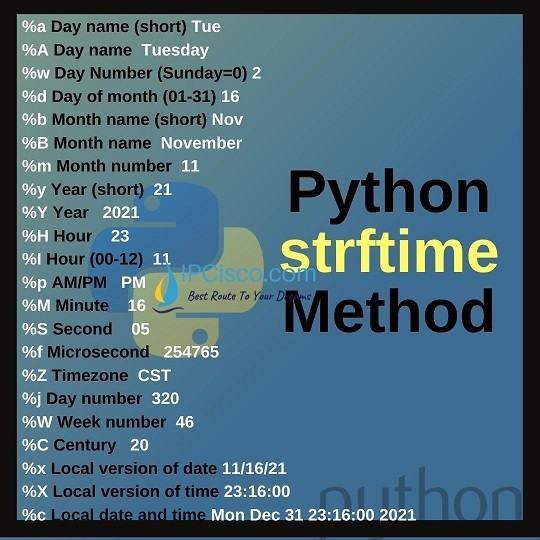

In [5]:
# Iteramos para todos los archivos con el primer tipo de formato.
for i in f_date_0:
    # Leemos el archivo de Excel.
    df_i[i] = pd.read_excel(path + files[i])
    # Unimos las columnas de fecha y hora.
    df_i[i]["fecha"] = df_i[i]["Date"] + " " + df_i[i]["Time"].astype(str)
    # Convertimos a fecha, utilizamos una cadena con los formatos
    # de fecha para que Python lo pueda reconocer.
    df_i[i]["fecha"] = pd.to_datetime( df_i[i]["fecha"],
        format = "%Y %b %d %H:%M:%S" )
    # Escogemos solo la precipitación.
    df_i[i] = df_i[i][ ["fecha", "Rain"] ]
    # Cambiamos el nombre de las columnas.
    df_i[i] = df_i[i].rename({"Rain": "Precipitacion"}, axis = 1)
    # Establecemos el índice.
    df_i[i] = df_i[i].set_index("fecha")
    
df_i[i].head()

/opt/homebrew/Caskroom/miniforge/base/envs/gv/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Precipitacion
fecha,
2003-06-01 00:00:00,0.0
2003-06-01 00:10:00,0.0
2003-06-01 00:20:00,0.0
2003-06-01 00:30:00,0.0
2003-06-01 00:40:00,0.0


In [6]:
# Iteramos para todos los archivos con el segundo tipo de formato.
for i in f_fecha_0:
    # Leemos el archivo de Excel.
    df_i[i] = pd.read_excel(path + files[i])
    # Convertimos a fecha, utilizamos una cadena con los formatos
    # de fecha para que Python lo pueda reconocer.
    df_i[i]["fecha"] = pd.to_datetime( df_i[i]["fecha"],
        format = "%Y-%b-%d %H:%M:%S" )
    # Escogemos solo la precipitación.
    df_i[i] = df_i[i][ ["fecha", "Precipitacion"] ]
    # Establecemos el índice.
    df_i[i] = df_i[i].set_index("fecha")

df_i[i].head()

,Precipitacion
fecha,
2022-05-01 00:00:00,0.0
2022-05-01 00:10:00,0.0
2022-05-01 00:20:00,0.0
2022-05-01 00:30:00,0.0
2022-05-01 00:40:00,0.0


In [7]:
# Iteramos para todos los archivos con el tercer tipo de formato.
for i in f_fecha_1:
    # Leemos el archivo de Excel.
    df_i[i] = pd.read_excel(path + files[i])
    # Convertimos a fecha, utilizamos una cadena con los formatos
    # de fecha para que Python lo pueda reconocer.
    df_i[i]["Fecha Local"] = pd.to_datetime( df_i[i]["Fecha Local"],
        format = "%Y-%b-%d %H:%M:%S" )
    # Escogemos solo la precipitación.
    df_i[i] = df_i[i][ ["Fecha Local", "Precipitación (mm)"] ]
    # Cambiamos el nombre de las columnas.
    df_i[i] = df_i[i].rename({"Fecha Local": "fecha",
        "Precipitación (mm)": "Precipitacion"}, axis = 1)
    # Establecemos el índice.
    df_i[i] = df_i[i].set_index("fecha")
    
df_i[i].head()

,Precipitacion
fecha,
2022-12-01 00:00:00,NaN
2022-12-01 00:10:00,NaN
2022-12-01 00:20:00,NaN
2022-12-01 00:30:00,NaN
2022-12-01 00:40:00,NaN


In [8]:
# Iteramos para todos los archivos con el cuarto tipo de formato.
for i in f_date_1:
    # Leemos el archivo de Excel.
    df_i[i] = pd.read_excel(path + files[i])
    # Quitamos la primera fila que tiene el nombre de las variables.
    df_i[i] = df_i[i][1:]
    # Unimos las columnas de fecha y hora.
    df_i[i]["fecha"] = df_i[i]["Date"] + " " + df_i[i]["Time"].astype(str)
    # Convertimos a fecha, utilizamos una cadena con los formatos
    # de fecha para que Python lo pueda reconocer.
    df_i[i]["fecha"] = pd.to_datetime( df_i[i]["fecha"],
        format = "%Y %b %d %H:%M:%S" )
    # Escogemos solo la precipitación.
    df_i[i] = df_i[i][ ["fecha", "Rain"] ]
    # Cambiamos el nombre de las columnas.
    df_i[i] = df_i[i].rename({"Rain": "Precipitacion"}, axis = 1)
    # Establecemos el índice.
    df_i[i] = df_i[i].set_index("fecha")

df_i[i].head()

/opt/homebrew/Caskroom/miniforge/base/envs/gv/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Precipitacion
fecha,
2009-12-01 00:00:00,0.25
2009-12-01 00:10:00,0
2009-12-01 00:20:00,0
2009-12-01 00:30:00,0.25
2009-12-01 00:40:00,0.25


In [9]:
# Unimos todas las filas.
df = pd.concat(df_i, axis = 0)
# Algunos archivos repiten el inicio del
# siguiente mes, quitamos los duplicados.
df = df[~df.index.duplicated()]
# Nos falta información que necesitamos para tener un dt constante y calcular 
# fácilmente la tabla de duración. asfreq nos rellena todos esos vacíos.
df = df.asfreq("10min")
# Los valores vacíos se rellenan en automático como nan, pero algunas filas
# tienen valores con un espacio.
df = df.replace(" ", np.nan)
# Algunos datos tienen formato de coma, como son pocos se pueden sustituir.
df = df.replace("0,25", 0.25)
# Cambiamos los valores de nan por 0. SOLO VALIDO PARA LA TABLA DE DURACIÓN.
df = df.replace(np.nan, 0)
# Convertimos a tipo float.
df["Precipitacion"] = df["Precipitacion"].astype(float)

# Calculamos la curva masa.
df["Curva masa"] = df["Precipitacion"].cumsum()

In [10]:
# Calculamos el delta de tiempo en horas.
dt = (df.index[1] - df.index[0]).seconds / 60 / 60

# Creamos una lista con los años que tenemos datos.
years = df.index.year.unique()
# Creamos una lista para meter dataframes con la información de cada año.
df_y = [None] * years.shape[0]

# Iteramos para cada año.
for j in range( years.shape[0] ):
    # Escogemos la información de un solo año.
    df_y[j] = df.loc[df.index.year == years[j], ["Curva masa"]].copy()
    # Para cada duración desde dt hasta dt * cantidad de filas, la duración
    # es la curva masa menos la curva masa recorrida.
    for i in range( 1, int(24 / dt) + 1 ):
        df_y[j][ dt * i ] = ( df_y[j]["Curva masa"]
            - df_y[j]["Curva masa"].shift(i) )

    # Quitamos la columna de la curva masa.
    df_y[j].drop("Curva masa", axis = 1, inplace = True)

    # Creamos un nuevo dataframe para la tabla de duración.
    df_y[j] = pd.DataFrame(df_y[j].max(axis = 0), columns = [years[j]] )
    df_y[j].index.name = "Duración"

# Unimos la tabla de duración de cada año en una sola tabla.
dur = pd.concat(df_y, axis = 1)
dur

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_21928/3044628174.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_y[j][ dt * i ] = ( df_y[j]["Curva masa"]


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Duración,,,,,,,,,,,,,,,,,,,,,
0.166667,7.87,27.43,10.67,8.13,16.00,7.62,8.64,10.67,8.38,12.95,...,9.14,5.08,12.19,3.56,11.94,7.11,11.43,10.41,6.86,2.54
0.333333,14.47,51.56,17.27,13.97,21.08,10.93,14.98,20.07,11.68,17.27,...,17.01,9.65,15.49,5.08,19.31,10.41,14.48,15.24,9.91,5.08
0.500000,19.55,66.80,20.57,18.29,29.21,16.52,17.27,23.12,11.69,19.81,...,19.04,14.73,18.28,6.61,26.17,12.44,16.77,18.80,11.69,5.84
0.666667,22.09,73.15,22.86,25.15,32.77,19.82,18.29,24.90,13.98,20.32,...,20.56,19.30,18.53,8.13,29.73,14.47,19.56,22.36,12.96,6.09
0.833333,23.11,75.44,24.38,30.99,34.80,21.34,18.54,24.90,15.00,20.57,...,22.34,24.13,18.79,8.89,31.51,15.74,21.85,25.66,15.25,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.333333,56.86,76.71,51.28,51.02,41.36,28.40,58.80,57.08,45.18,48.40,...,89.11,61.18,57.71,26.83,50.65,51.78,51.00,44.20,40.29,18.21
23.500000,56.86,76.71,51.28,51.02,41.87,28.40,60.07,57.08,45.18,48.65,...,89.11,61.18,57.96,26.83,50.65,51.78,51.25,44.20,40.29,18.21
23.666667,56.86,76.71,51.28,51.02,42.38,28.40,61.59,57.08,45.18,48.65,...,89.11,61.18,58.21,26.83,50.65,51.78,51.76,44.20,40.29,18.21


In [11]:
# Dividimos la precipitación entre la duración que le corresponde
# para obtener la intensidad.
dur = dur.apply(lambda x: x / dur.index ).T
# Ordenamos cada columna de menor a mayor y luego invertimos
# para que quede de mayor a menor.
dur_np = np.flip(np.sort( dur.values, axis = 0 ), axis = 0)
dur = pd.DataFrame( dur_np, columns = dur.columns )
# Queremos que el índice empiece en 1.
dur.index += 1
# Calculamos el tiempo de retorno.
dur.index = (dur.index[-1] + 1) / dur.index
# Covertimos la duración a minutos.
dur.columns *= 60
dur.index.name = "T"
dur.columns.name = "d"

dur

d,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,...,1350.0,1360.0,1370.0,1380.0,1390.0,1400.0,1410.0,1420.0,1430.0,1440.0
T,,,,,,,,,,,,,,,,,,,,,
24.000000,164.58,154.68,133.6,109.725,90.528,76.71,65.751429,57.5325,51.14,46.026,...,3.960444,3.931324,3.902628,3.874348,3.846475,3.819,3.791915,3.765211,3.738881,3.712917
12.000000,96.0,63.24,58.42,49.155,41.76,35.56,31.568571,29.145,26.92,25.446,...,3.409333,3.384265,3.359562,3.335217,3.311223,3.287571,3.264255,3.241268,3.218601,3.19625
8.000000,77.7,60.21,52.34,44.595,37.812,34.29,30.917143,27.4275,26.413333,25.296,...,2.719111,2.699118,2.679416,2.66,2.640863,2.622,2.603404,2.602394,2.626993,2.640417
6.000000,73.14,57.93,46.24,37.725,37.188,33.03,28.962857,27.24,24.213333,21.942,...,2.536889,2.518235,2.499854,2.487391,2.494101,2.52,2.55617,2.58507,2.566993,2.549167
4.800000,71.64,51.81,41.14,37.35,30.792,28.45,27.865714,25.9125,23.54,21.798,...,2.527111,2.508529,2.494599,2.481739,2.480288,2.473286,2.466383,2.459577,2.442378,2.435833
4.000000,68.58,51.81,39.62,34.29,29.88,27.69,25.697143,25.155,23.373333,21.336,...,2.509333,2.501912,2.490219,2.472174,2.463885,2.446286,2.428936,2.411831,2.394965,2.378333
3.428571,64.02,51.03,39.62,33.9,29.256,24.9,21.762857,19.4325,18.106667,17.514,...,2.410222,2.426029,2.441606,2.456957,2.454388,2.436857,2.419574,2.402535,2.385734,2.369167
3.000000,64.02,48.78,39.1,33.54,28.956,24.89,21.557143,19.0425,17.94,17.058,...,2.301333,2.284412,2.267737,2.251304,2.235108,2.219143,2.203404,2.187887,2.172587,2.167083
2.666667,62.46,48.0,38.62,33.135,27.732,24.37,21.548571,19.0425,17.613333,16.308,...,2.279111,2.262353,2.245839,2.229565,2.213525,2.197714,2.182128,2.187042,2.171748,2.1575


In [12]:
# Regresión idT.

# Ordenamos la información por columnas.
y   = np.log(  dur.astype(float)           ).to_numpy().flatten(order = "F")
# Repetimos x_1 y x_2 varias veces para tener la misma cantidad de datos que y.
# Tile repite todo el arreglo tantas veces como queramos.
x_1 = np.tile( np.log( dur.index.astype(float)   ).to_numpy(), dur.shape[1])
# Repeat repite cada valor tantas veces como queramos.
x_2 = np.log(  dur.columns.astype(float) ).to_numpy().repeat(dur.shape[0])
# Creamos la columna de X que corresponde a las ordenadas.
x_0 = np.ones_like(x_1)

In [13]:
# Regresión lineal múltiple.

# Predictando.
Y = y
# Predictores.
X = np.swapaxes( np.stack([x_0, x_1, x_2]), 0, 1)

# Coeficientes de regresión.
B = np.linalg.inv( X.T @ X ) @ ( X.T @ Y )

# Coeficientes de las curvas idT.
k = np.exp(B[0])
m = B[1]
n = -B[2]

In [14]:
# Función que nos genera una curva idT.
def idT(d, T, k, m, n):
    return ( k * T ** m ) / d ** n

# Escogemos una serie de periodos de retorno y les calculamos las curvas idT.
T = np.array( [1, 10, 25, 50, 100] )
d = np.linspace(1, 2000, 10000)
i = [None] * T.shape[0]
for j in range( T.shape[0] ):
    i[j] = idT(d, T[j], k, m, n)

# Metemos las curvas idT a un DataFrame.
c_idT = pd.DataFrame(i, index = T, columns = d).T
c_idT.index.name = "d [min]"
c_idT.columns.name = "T [años]"
c_idT

T [años],1,10,25,50,100
d [min],,,,,
1.00000,350.641209,907.945339,1325.828105,1765.516727,2351.020695
1.19992,304.932510,789.587887,1152.996516,1535.368444,2044.547599
1.39984,270.965609,701.634477,1024.562460,1364.341391,1816.802297
1.59976,244.615119,633.402897,924.927225,1231.663804,1640.124417
1.79968,223.507061,578.745991,845.114423,1125.382426,1498.596605
...,...,...,...,...,...
1999.20032,1.035656,2.681712,3.915973,5.214640,6.943988
1999.40024,1.035576,2.681507,3.915673,5.214241,6.943456
1999.60016,1.035497,2.681302,3.915373,5.213841,6.942924


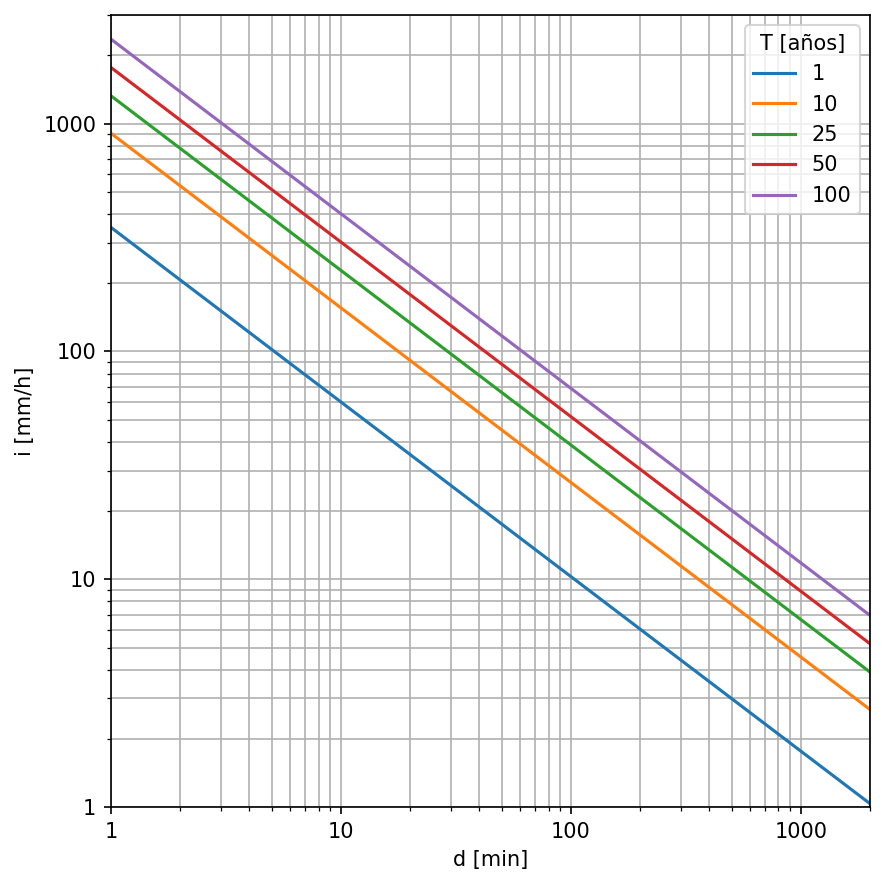

In [15]:
# Graficamos las curvas idT.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos.
c_idT.plot(ax = ax)

# Estilo.
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1, 2000)
ax.set_ylim(1, 3000)
ax.set_ylabel("i [mm/h]")
ax.xaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
ax.grid(which = "both")

fig.tight_layout()
plt.show()

In [16]:
# Convertimos las curvas idT a curvas de altura de precipitación.

hp = c_idT.apply(lambda x: x * c_idT.index / 60)
hp

T [años],1,10,25,50,100
d [min],,,,,
1.00000,5.844020,15.132422,22.097135,29.425279,39.183678
1.19992,6.098244,15.790705,23.058393,30.705322,40.888226
1.39984,6.321808,16.369600,23.903725,31.830994,42.387208
1.59976,6.522091,16.888210,24.661026,32.839441,43.730090
1.79968,6.704020,17.359293,25.348925,33.755470,44.949905
...,...,...,...,...,...
1999.20032,34.508059,89.354674,130.480254,173.751839,231.373718
1999.40024,34.508865,89.356762,130.483303,173.755898,231.379123
1999.60016,34.509671,89.358849,130.486351,173.759957,231.384528


In [17]:
# Escogemos un tiempo de retorno de 25 años
# y obtenemos la curva masa y el hietograma.

tormenta = hp[[25]]
tormenta.index.name = "t [min]"
tormenta.columns.name = ""
tormenta = tormenta.rename({25: "Curva masa [mm]"}, axis = 1)
tormenta.loc[0.0] = 0
tormenta = tormenta.sort_index()

# Calculamos el hietograma.
tormenta["hp [mm]"] = ( tormenta["Curva masa [mm]"]
    - tormenta["Curva masa [mm]"].shift(1) )
tormenta.loc[0.0, "hp [mm]"] = 0
tormenta["i [mm/h]"] = tormenta["hp [mm]"] / dt

tormenta

,Curva masa [mm],hp [mm],i [mm/h]
t [min],,,
0.00000,0.000000,0.000000,0.000000
1.00000,22.097135,22.097135,132.582811
1.19992,23.058393,0.961258,5.767546
1.39984,23.903725,0.845332,5.071993
1.59976,24.661026,0.757301,4.543806
...,...,...,...
1999.20032,130.480254,0.003049,0.018292
1999.40024,130.483303,0.003048,0.018290
1999.60016,130.486351,0.003048,0.018289


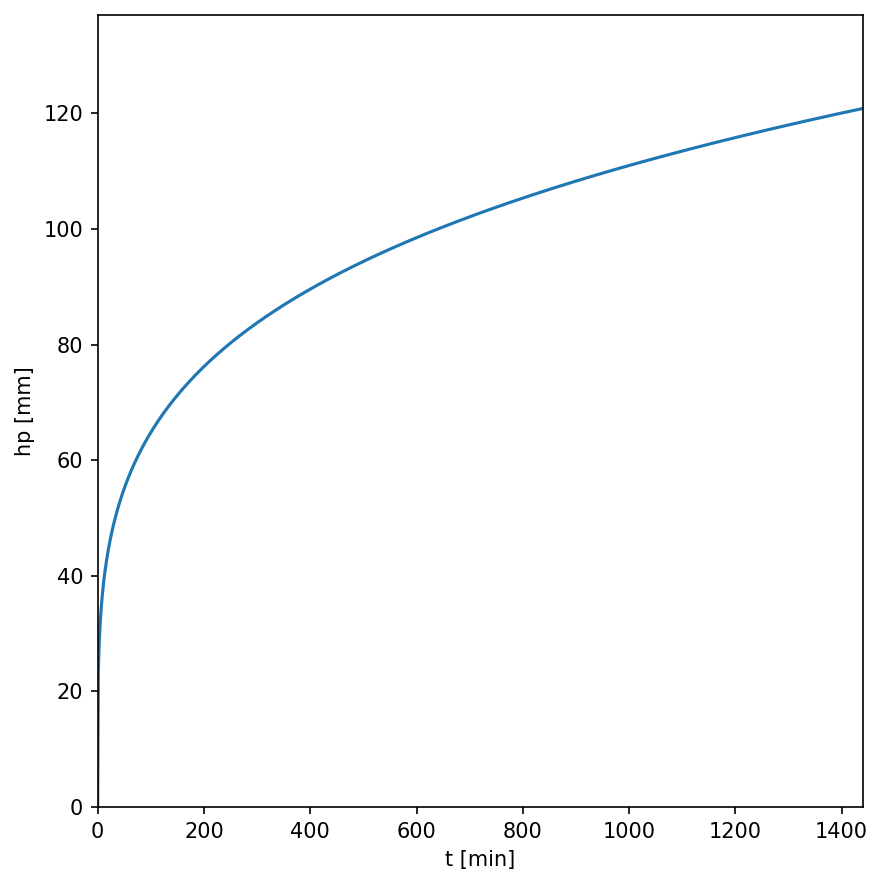

In [18]:
# Curva masa.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos la curva masa.
tormenta["Curva masa [mm]"].plot(ax = ax)

# Estilo.
ax.set_xlim(0, 1440)
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")

fig.tight_layout()
plt.show()

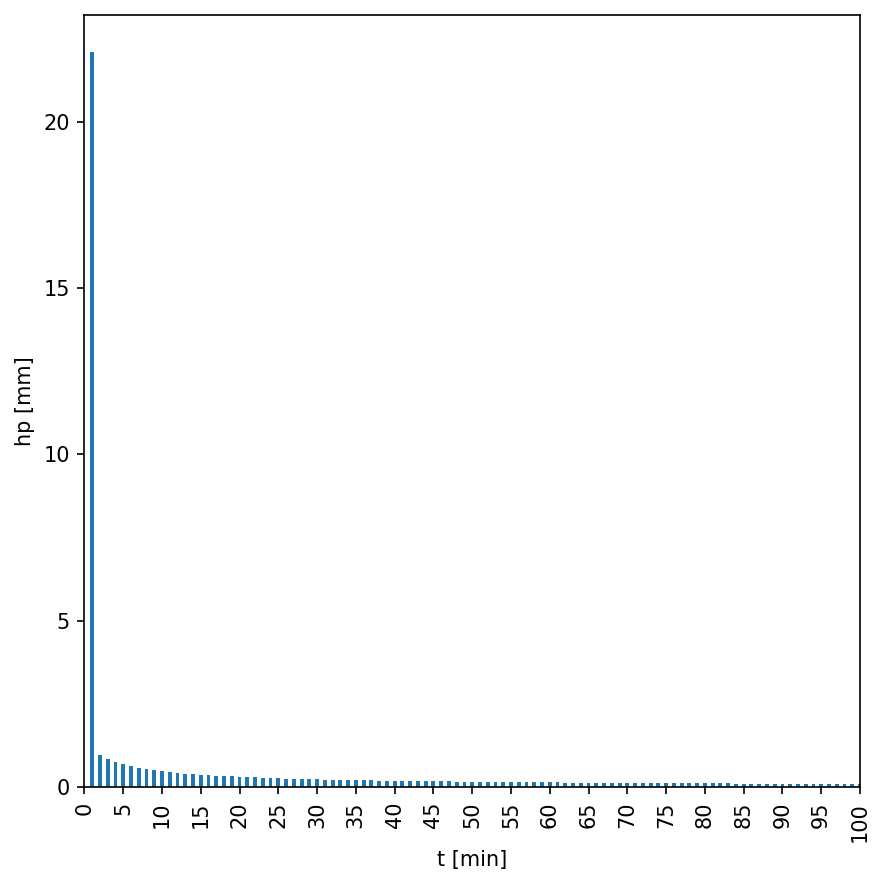

In [19]:
# Hietograma.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos el hietograma.
tormenta["hp [mm]"].plot.bar(ax = ax)

# Estilo.
ax.set_xlim(0, 100)
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")
ax.xaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
ax.xaxis.set_major_locator( plt.MaxNLocator(20) )

fig.tight_layout()
plt.show()